# Preprocessing

## Data Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/raw/ResectMap_DATA_2023-11-13_2306.csv")
# Dataframe with basic information per patient
df_mrn = df[df["mrn"].notna()]
# Dataframe with Engel outcomes
df_engel = df[df["redcap_repeat_instrument"] == "engel_outcomes"]

C:\Users\Amaury\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (8,20,31,39,65,79,83,85,127,130,132,150,153,161,308,313,317,321,325,329,330,334,377,385,403,409,439,440,441,442,443,444,445,453,463,475,512,523,524,525,526,527,528,529,537,566,572,574,588,589,590,591,592,601,602,604,605,606,608,620,621,622,627,633,636,637,639,646,647,658,676,677,682,695,698,712,714,718,720,721,723,725,726,728,732,733,735,748,750,754,757,759,761,762,764,768,770,772,774,776,780,782,786,787,791,796,803,810,812,813,814,815,817,818,880,887,888,896,904,905,906,968,975,976,984,992,993,994,1056,1063,1064,1072,1080,1081,1082,1144,1151,1152,1169,1170,1232,1239,1240,1257,1258,1320,1327,1328,1345,1408,1415,1416,1432,1433,1496,1503,1521,1523,1540,1541,1558,1559,1576,1577,1595,1613,1631,1649,1667,1669,1670,1671,1678,1730,1738,1790,1801,1802,1811,1819,1820,1821,1822,1823,1830,1882,1890,1942,1953,1954,1963,1971,1972,1973,1974,1975,1982,2034,2042,2094,2105,2106,211

In [3]:
# Print the number of participants
print("Number of participants in the main df:", df["record_id"].nunique())
print("Number of participants in the MRN df:", df_mrn["record_id"].nunique())
print("Same as number of row ?", df_mrn["record_id"].nunique()==len(df_mrn))
print("Number of participants in the Engel df:", df_engel["record_id"].nunique())
print("Same as number of row ?", df_engel["record_id"].nunique()==len(df_engel))

Number of participants in the main df: 677
Number of participants in the MRN df: 677
Same as number of row ? True
Number of participants in the Engel df: 677
Same as number of row ? False


## Distribution of age

In [4]:
print("Minimum age:", df_mrn["age"].min(), "\nMaximum age:", df_mrn["age"].max())

Minimum age: 2.0 
Maximum age: 84.0


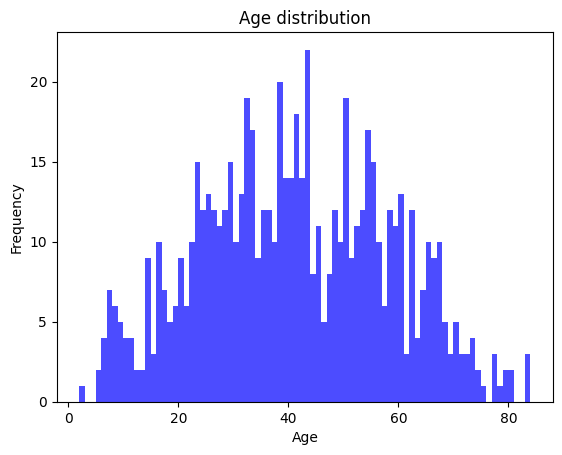

In [5]:
# Create a histogram
plt.hist(df_mrn["age"], bins=82, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Show the plot
plt.show()

## Distribution of sex/gender

In [6]:
# Before, 1 represented female and 2 represented male
# Now, 0 represents female and 1 represents male
df_mrn["sex_gender"] = df_mrn["sex_gender"].map({1: 0, 2: 1})

# Define a mapping dictionary
gender_mapping = {0: 'female', 1: 'male'} 

# Count the number of males and females in the dataset
df_mrn["sex_gender"].replace(gender_mapping).value_counts()

C:\Users\Amaury\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


female    345
male      332
Name: sex_gender, dtype: int64

In [7]:
# Print patients with multiple Engel outcomes
df_engel[df_engel['record_id'].duplicated()]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_nw_z,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,RSCT041607,engel_outcomes,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2814,RSCT058378,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3117,RSCT064938,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,RSCT066862,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4412,RSCT091205,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of Engel outcomes

In [8]:
# Create 1 column out of the 4 dummy variables for engel outcome
df_engel['surg_engel'] = df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_engel[["record_id", "surg_engel"]].head()

C:\Users\Amaury\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,record_id,surg_engel
9,RSCT000111,2
26,RSCT000208,3
35,RSCT000277,4
40,RSCT000508,1
48,RSCT000749,2


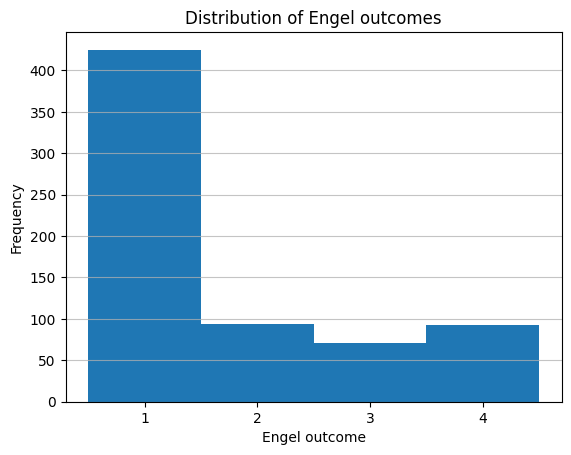

In [9]:
# Create a histogram of the 'surg_engel' variable
plt.hist(df_engel['surg_engel'], bins=[1, 2, 3, 4, 5])  # Specify the bin edges

# Customize x-axis ticks and labels
bin_centers = [1.5, 2.5, 3.5, 4.5]
plt.xticks(bin_centers, ['1', '2', '3', '4'])

# Add labels and title
plt.xlabel('Engel outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Engel outcomes')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

## Distribution of Race

In [29]:
# Create 1 column out of the 7 dummy variables for race
df_mrn['race'] = df_mrn[['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_mrn[["record_id", "race"]].head()

C:\Users\Amaury\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,record_id,race
0,RSCT000111,1
12,RSCT000208,7
31,RSCT000277,3
38,RSCT000508,6
42,RSCT000749,3


In [30]:
# Define a mapping dictionary
race_mapping = {1: 'African-American/Black', 2: 'Asian', 3: 'Caucasian/White', 4: 'Native American.Alaska Native', 5: 'Native Hawaiian/Other Pacific Islander', 6: 'Other', 7: 'Unknown/Not-Reported'}

# Count the number of males and females in the dataset
df_mrn["race"].replace(race_mapping).value_counts()

Caucasian/White                           460
Other                                      80
African-American/Black                     55
Unknown/Not-Reported                       51
Asian                                      29
Native Hawaiian/Other Pacific Islander      2
Name: race, dtype: int64

## Table of Na percentage per column (df_mrn)

No data in df_mrn from column 380 and on

In [13]:
# Calculate the percentage of NaN values per column
na_percentage = (df_mrn.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Display the resulting DataFrame
print(na_df)


                                   Column  Percentage of NaN
0                               record_id                0.0
1                redcap_repeat_instrument              100.0
2                  redcap_repeat_instance              100.0
3                                     mrn                0.0
4                              study_site                0.0
...                                   ...                ...
4672                          cshq_ds_raw              100.0
4673                            cshq_ds_z              100.0
4674                       cshq_total_raw              100.0
4675                         cshq_total_z              100.0
4676  neuropsychological_testing_complete              100.0

[4677 rows x 2 columns]


In [20]:
# Check for a value in the df
nan_string_check = (df == "nan").any()
print("Columns with '...' values:")
print(nan_string_check[nan_string_check].index)

Columns with 'nan' values:
Index([], dtype='object')


There appears to be 2 instance where the column "engel_outcomes_complete" has the value 0 instead of 2 which matches with a patient with 3 engel outcomes

In [23]:
df_engel["engel_outcomes_complete"].unique()
df_engel[df_engel["engel_outcomes_complete"]==0]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete,surg_engel
2042,RSCT041607,engel_outcomes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [24]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

                                     redcap_repeat_instance       mrn  \
redcap_repeat_instance                             1.000000       NaN   
mrn                                                     NaN  1.000000   
study_site                                              NaN       NaN   
study_site_other                                        NaN       NaN   
ny_num_yn                                               NaN  0.160692   
...                                                     ...       ...   
srs_smot_2t                                             NaN       NaN   
srs_mann_raw_2                                          NaN       NaN   
srs_mann_2t                                             NaN       NaN   
cshq_comp                                         -0.055827       NaN   
neuropsychological_testing_complete                     NaN       NaN   

                                     study_site  study_site_other  ny_num_yn  \
redcap_repeat_instance                     